In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
elecciones = pd.read_csv('data/g9_data.csv')

In [31]:
elecciones.reset_index(drop=True)

,año,eleccion_tipo,eleccion_id,recuento_tipo,recuento_id,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,7.0,Sección Séptima,...,NATIVOS,346,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,98
1,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,7.0,Sección Séptima,...,NATIVOS,346,1,PRESIDENTE Y VICE,132,JUNTOS POR EL CAMBIO,NaN,NaN,POSITIVO,71
2,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,7.0,Sección Séptima,...,NATIVOS,346,1,PRESIDENTE Y VICE,135,LA LIBERTAD AVANZA,NaN,NaN,POSITIVO,71
3,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,7.0,Sección Séptima,...,NATIVOS,346,1,PRESIDENTE Y VICE,133,HACEMOS POR NUESTRO PAIS,NaN,NaN,POSITIVO,13
4,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,7.0,Sección Séptima,...,NATIVOS,346,1,PRESIDENTE Y VICE,136,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,NaN,NaN,POSITIVO,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330054,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,2.0,Sección Segunda,...,NATIVOS,93,9,PARLAMENTO MERCOSUR REGIONAL,0,NaN,NaN,NaN,EN BLANCO,13
330055,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,2.0,Sección Segunda,...,NATIVOS,93,9,PARLAMENTO MERCOSUR REGIONAL,0,NaN,NaN,NaN,NULO,0
330056,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,2.0,Sección Segunda,...,NATIVOS,93,9,PARLAMENTO MERCOSUR REGIONAL,0,NaN,NaN,NaN,IMPUGNADO,0
330057,2023,GENERAL,2,PROVISORIO,1,NORMAL,2,Buenos Aires,2.0,Sección Segunda,...,NATIVOS,93,9,PARLAMENTO MERCOSUR REGIONAL,0,NaN,NaN,NaN,RECURRIDO,0


In [297]:
print(elecciones['seccionprovincial_id'].unique(), elecciones['seccionprovincial_nombre'].unique(), elecciones['seccionprovincial_nombre'].nunique())

[7. 2. 8.] ['Sección Séptima' 'Sección Segunda' 'Sección Capital'] 3


### Unicidad

In [30]:
"""
Primero veamos la forma de identificar un dato uniquivocamente en el dataset.

Por lo tanto, para identificar la cantidad de votos de una categoria para un cierto cargo electoral en una mesa, podemos usar como PK:
- el circuito electoral
- el numero de mesa
- el cargo electoral
- la categoria

"""

# Primero veamos cuantos registros hay en el dataset
print(len(elecciones), "registros totales")

# Agrupar por 'circuito_id' y contar la cantidad única de 'mesa_id'
mesas_unicas = elecciones.groupby(['circuito_id','cargo_nombre', 'agrupacion_id', 'votos_tipo', 'mesa_id']).size().reset_index()

# Me quedo con los grupos que tienen size > 1
mesas_unicas = mesas_unicas[mesas_unicas[0] > 1]

# Mostrar las combinaciones 'circuito_id', 'mesa_id', 'agrupacion_id' que tienen agrupaciones repetidas
if not mesas_unicas.empty:
    print("Existen circuitos con mesas repetidas:")
    print(mesas_unicas)
else:
    print("No existen circuitos con mesas repetidas.")

"""
Veamos que para una agrupacion no hay mas de un cargo por mesa
"""

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'circuito_id', 'mesa_id', 'agrupacion_id' y otras columnas relevantes

# Agrupar por 'circuito_id', 'mesa_id', 'agrupacion_id' y contar la cantidad de filas para cada combinación
conteo_agrupaciones = elecciones.groupby(['circuito_id', 'mesa_id','cargo_nombre','agrupacion_id','votos_tipo']).size().reset_index(name='conteo')

# Filtrar las filas donde el conteo sea mayor que 1 (indicando que hay más de una entrada para la misma combinación)
agrupaciones_repetidas = conteo_agrupaciones[conteo_agrupaciones['conteo'] > 1]

# Mostrar las combinaciones 'circuito_id', 'mesa_id', 'agrupacion_id' que tienen agrupaciones repetidas
if not agrupaciones_repetidas.empty:
    print("Existen combinaciones con agrupaciones repetidas:")
    print(agrupaciones_repetidas)
else:
    print("No existen combinaciones con agrupaciones repetidas.")


330059 registros totales
Empty DataFrame
Columns: [circuito_id, cargo_nombre, agrupacion_id, votos_tipo, mesa_id, 0]
Index: []
No existen circuitos con mesas repetidas.
No existen combinaciones con agrupaciones repetidas.


In [65]:
"""
Veamos los diferentes valores de las variables categoricas
"""
print(elecciones['año'].unique())
print(elecciones['eleccion_tipo'].unique())
print(elecciones['recuento_tipo'].unique())
print(elecciones['padron_tipo'].unique())
print(elecciones['distrito_nombre'].unique())
print(elecciones['seccionprovincial_nombre'].unique())
print(elecciones['seccion_nombre'].unique())
print(elecciones['cargo_nombre'].unique())
print(elecciones['agrupacion_nombre'].unique()) # Los nan son debido a los votos no positivos
print(elecciones['votos_tipo'].unique())

"""
Existe un registro con un valor erroneo en el tipo de padron. 
NOREAL en lugar de NORMAL
"""


[2023]
['GENERAL']
['PROVISORIO']
['NORMAL' 'NOREAL']
['Buenos Aires']
['Sección Séptima' 'Sección Segunda' 'Sección Capital']
['Azul' 'Baradero' 'Arrecifes' 'Bolívar' 'Capitán Sarmiento'
 'Carmen de Areco' 'Colón' 'Exaltación de la Cruz' 'General Alvear'
 'La Plata' 'Olavarría' 'Pergamino' 'Ramallo' 'Rojas' 'Roque Pérez'
 'Saladillo' 'Salto' 'San Andrés de Giles' 'San Antonio de Areco'
 'San Nicolás' 'San Pedro' 'Tapalqué' '25 de Mayo' 'Zárate']
['PRESIDENTE Y VICE' 'SENADOR NACIONAL' 'DIPUTADO NACIONAL'
 'GOBERNADOR Y VICE' 'SENADOR PROVINCIAL' 'DIPUTADO PROVINCIAL'
 'INTENDENTE' 'PARLAMENTO MERCOSUR NACIONAL'
 'PARLAMENTO MERCOSUR REGIONAL']
['UNION POR LA PATRIA' 'JUNTOS POR EL CAMBIO' 'LA LIBERTAD AVANZA'
 'HACEMOS POR NUESTRO PAIS'
 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD' nan 'BARADERO 400 AÑOS'
 'PARTIDO AUTONOMISTA' 'MOVIMIENTO LIBRES DEL SUR'
 'AGRUP.VECINAL 24 DE OCTUBRE' 'PRIMERO SAN NICOLAS']
['POSITIVO' 'EN BLANCO' 'NULO' 'IMPUGNADO' 'RECURRIDO' 'COMANDO']


### Consistencia

In [22]:
"""
Primero chequearemos la consistencia de _id con _nombre
"""
def verificar_correlacion(fromp, top):
    unicos = elecciones.groupby(fromp)[top].unique().reset_index()

    repetidos = unicos[unicos[top].str.len() > 1]
    if not repetidos.empty:
        print(f"Existen {fromp} asociados a mas de un {top}:")
        print(repetidos)
    else:
        print(f"No existen mas de una combinacion de {fromp} y {top}.")


verificar_correlacion('distrito_id', 'distrito_nombre')
verificar_correlacion('seccionprovincial_id', 'seccionprovincial_nombre')
verificar_correlacion('seccion_id', 'seccion_nombre')
verificar_correlacion('circuito_id', 'circuito_nombre')
verificar_correlacion('cargo_id', 'cargo_nombre')
verificar_correlacion('agrupacion_id', 'agrupacion_nombre')

No existen mas de una combinacion de distrito_id y distrito_nombre.
No existen mas de una combinacion de seccionprovincial_id y seccionprovincial_nombre.
No existen mas de una combinacion de seccion_id y seccion_nombre.
No existen mas de una combinacion de circuito_id y circuito_nombre.
No existen mas de una combinacion de cargo_id y cargo_nombre.
No existen mas de una combinacion de agrupacion_id y agrupacion_nombre.


In [23]:
"""
Verifiquemos que cada circuito pertenece a una seccion
"""
def verificar_subagrupamiento(col_from, col_to):
    agrupado = elecciones.groupby(col_from)[col_to].unique().reset_index()

    agrupado = agrupado[agrupado[col_to].apply(lambda x: len(x) > 1)]

    if not agrupado.empty:
        print(f"Hay {col_from} que estan asociados a mas de un {col_to}:")
        print(agrupado)
    else:
        print(f"Todos los {col_from} estan asociados a solo un {col_to}.")

verificar_subagrupamiento('seccionprovincial_nombre', 'distrito_nombre')
verificar_subagrupamiento('seccion_nombre', 'seccionprovincial_nombre')
verificar_subagrupamiento('circuito_nombre', 'seccion_nombre')


Todos los seccionprovincial_nombre estan asociados a solo un distrito_nombre.
Todos los seccion_nombre estan asociados a solo un seccionprovincial_nombre.
Todos los circuito_nombre estan asociados a solo un seccion_nombre.


In [24]:
""" 
Verifiquemos que por mesa y circuito, el mesa_electores es igual
"""

def verificar_electores():
    agrupado = elecciones.groupby(['circuito_id', 'mesa_id'])['mesa_electores'].unique().reset_index()

    agrupado = agrupado[agrupado['mesa_electores'].apply(lambda x: len(x) > 1)]

    if not agrupado.empty:
        print(f"Hay mesas que estan asociados a mas de un mesa_electores:")
        print(agrupado)
    else:
        print(f"Todas las mesas estan asociados a solo un mesa_electores.")

verificar_electores()

Todas las mesas estan asociados a solo un mesa_electores.


### Coherencia

In [25]:
# Por mesa hay menos o igual votos que la cantidad de electores
elecciones['asistencia_mesa'] = elecciones.groupby(['seccion_nombre', 'mesa_id', 'cargo_nombre'])['votos_cantidad'].transform('sum')

# Eliminamos las mesas que tienen mas votos que electores
df_incosistente = elecciones[elecciones['asistencia_mesa'] > elecciones['mesa_electores']]
if not df_incosistente.empty:
    print(f"Hay mesas con mas votos que electores:")
    print(df_incosistente)
else:
    print(f"Todas las mesas tienen igual o menos votos que electores.")


# Agrupar el DataFrame por 'seccion_nombre' y 'mesa_id', y sumar los votos por cargo
mesas_con_sumas_distintas = elecciones.groupby(['circuito_id', 'mesa_id', 'cargo_id'])['votos_cantidad'].sum().reset_index()

# Calcular la cantidad única de sumas de votos dentro de cada grupo (es decir, mesas donde la suma de votos por cargo es distinta)
mesas_con_sumas_distintas = mesas_con_sumas_distintas.groupby(['circuito_id', 'mesa_id'])['votos_cantidad'].nunique().reset_index()

# Filtrar las mesas donde haya más de una suma de votos distinta para diferentes cargos
mesas_con_sumas_distintas = mesas_con_sumas_distintas[mesas_con_sumas_distintas['votos_cantidad'] > 1]


# Filtrar el DataFrame original por indice para quedarnos solo con las mesas que cumplen con el criterio
df_incosistente = elecciones.set_index(['circuito_id', 'mesa_id']).loc[mesas_con_sumas_distintas.set_index(['circuito_id', 'mesa_id']).index].reset_index()

if not df_incosistente.empty:
    print(f"Hay mesas con distinta cantidad de votos totales por cargo: {len(df_incosistente)}")

Todas las mesas tienen igual o menos votos que electores.
Hay mesas con distinta cantidad de votos totales por cargo: 112592


En la deteccion de anomalias hablaremos mas sobre estas mesas incosistentes, las cuales tienen diferente cantidad de votos dependiendo el cargo.

## Analisis

Efectuar un análisis descriptivo de los resultados para cada categoría en cada sección de las unidades geográficas asignadaa para el cargo de presidente / vice, diputados nacionales y senadores nacionales.

In [52]:
# Filtrar los DataFrames por categoría (presidente/vice, diputados nacionales y senadores nacionales)
presidente_df = elecciones[elecciones['cargo_nombre'] == 'PRESIDENTE Y VICE']
diputados_df = elecciones[elecciones['cargo_nombre'] == 'DIPUTADOS NACIONALES']
senadores_df = elecciones[elecciones['cargo_nombre'] == 'SENADORES NACIONALES']


# Función para realizar un análisis descriptivo y agregar los resultados al DataFrame "elecciones"
def agregar_analisis_descriptivo(dataframe, categoria):
    metricas = pd.DataFrame(columns=['Categoria', 'Seccion', 'Agrupacion', 'Promedio', '#Ceros', 'Mediana', 'Desviacion_Estandar', 'Minimo', 'Maximo', '1er Cuartil', '3er Cuartil'])
    for seccion in dataframe['seccion_nombre'].unique():
        seccion_data = dataframe[dataframe['seccion_nombre'] == seccion]
        agrupaciones = seccion_data['agrupacion_nombre'].unique()
        no_positivos = seccion_data[seccion_data['votos_tipo'] != 'POSITIVO']['votos_tipo'].unique()
        for categoria in np.concatenate([agrupaciones,no_positivos]):
            categoria_data = seccion_data[(seccion_data['agrupacion_nombre'] == categoria) | (seccion_data['votos_tipo'] == categoria)]
            resumen = categoria_data['votos_cantidad'].describe()
            metricas = metricas.append({
                'Categoria': categoria,
                'Seccion': seccion,
                'Agrupacion': categoria,
                'Promedio': resumen['mean'],
                'Mediana': resumen['50%'],
                '#Ceros': categoria_data[categoria_data['votos_cantidad'] == 0]['votos_cantidad'].count(),
                'Desviacion_Estandar': resumen['std'],
                'Minimo': resumen['min'],
                'Maximo': resumen['max'],
                '1er Cuartil': resumen['25%'],
                '3er Cuartil': resumen['75%']
            }, ignore_index=True)
    
    return metricas

# Realizar análisis descriptivo y agregar los resultados a "elecciones" para cada categoría
df1= agregar_analisis_descriptivo(presidente_df, "PRESIDENTE Y VICE")
df2=agregar_analisis_descriptivo(diputados_df, "DIPUTADOS NACIONALES")
df3=agregar_analisis_descriptivo(senadores_df, "SENADORES NACIONALES")

metricas = pd.concat([df1, df2, df3], ignore_index=True)

# Mostrar el DataFrame con los resultados
metricas

,Categoria,Seccion,Agrupacion,Promedio,#Ceros,Mediana,Desviacion_Estandar,Minimo,Maximo,1er Cuartil,3er Cuartil
0,UNION POR LA PATRIA,Azul,UNION POR LA PATRIA,80.824859,4,86.0,25.033792,0.0,133.0,75.0,95.0
1,JUNTOS POR EL CAMBIO,Azul,JUNTOS POR EL CAMBIO,65.887006,2,68.0,19.107611,0.0,110.0,60.0,75.0
2,LA LIBERTAD AVANZA,Azul,LA LIBERTAD AVANZA,73.875706,2,78.0,20.073341,0.0,112.0,70.0,85.0
3,HACEMOS POR NUESTRO PAIS,Azul,HACEMOS POR NUESTRO PAIS,15.858757,4,16.0,7.434360,0.0,80.0,13.0,19.0
4,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,Azul,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,6.186441,9,6.0,2.937655,0.0,14.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
259,EN BLANCO,Zárate,EN BLANCO,8.725424,26,9.0,5.709748,0.0,33.0,4.0,12.0
260,NULO,Zárate,NULO,1.528814,140,1.0,2.019888,0.0,11.0,0.0,2.0
261,IMPUGNADO,Zárate,IMPUGNADO,0.016949,291,0.0,0.153366,0.0,2.0,0.0,0.0
262,RECURRIDO,Zárate,RECURRIDO,0.067797,282,0.0,0.362550,0.0,4.0,0.0,0.0


In [300]:
df_cargos = df_g9[(df_g9['cargo_id'] == 1) | (df_g9['cargo_id'] == 2) | (df_g9['cargo_id'] == 3) ]
df_cargos_ag = df_cargos[(df_g9['agrupacion_id'] == 134) | (df_cargos['agrupacion_id'] == 135) | (df_cargos['agrupacion_id'] == 132) | \
                            (df_g9['agrupacion_id'] == 133) | (df_cargos['agrupacion_id'] == 136)]
agrupaciones = df_cargos_ag['agrupacion_nombre'].unique()
lista_cantidad_por_a_en_cargo = []
for a in agrupaciones:
    query = 'agrupacion_nombre == "{x}"'.format(x=a)
    query_res = df_cargos.query(query)
    cantidad_por_a_en_cargo= query_res.groupby(['cargo_id'])['votos_cantidad'].sum()
    lista_cantidad_por_a_en_cargo.append(cantidad_por_a_en_cargo.values/query_res.groupby(['cargo_id'])['mesa_electores'].sum())


C:\Users\Cami\AppData\Local\Temp\ipykernel_6608\895313866.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cargos_ag = df_cargos[(df_g9['agrupacion_id'] == 134) | (df_cargos['agrupacion_id'] == 135) | (df_cargos['agrupacion_id'] == 132) | \


In [292]:
secciones = df_cargos_ag['seccionprovincial_nombre'].unique()
votos_por_seccion = []
for seccion in secciones:
    df_seccion_c = df_cargos[df_cargos['seccionprovincial_nombre']==seccion]
    votos_por_cargo = []
    for c in df_cargos['cargo_nombre'].unique():
        df_seccion_cargo_c = df_seccion_c[df_seccion_c['cargo_nombre']==c]
        votos_por_a = []
        for a in df_cargos['agrupacion_nombre'].unique():
            df_por_a = df_seccion_cargo_c[df_seccion_cargo_c['agrupacion_nombre'] == a]
            votos_por_a.append(df_por_a['votos_cantidad'].sum())
        votos_por_cargo.append(votos_por_a/df_seccion_cargo_c['mesa_electores'].sum())
    votos_por_seccion.append(votos_por_cargo)    


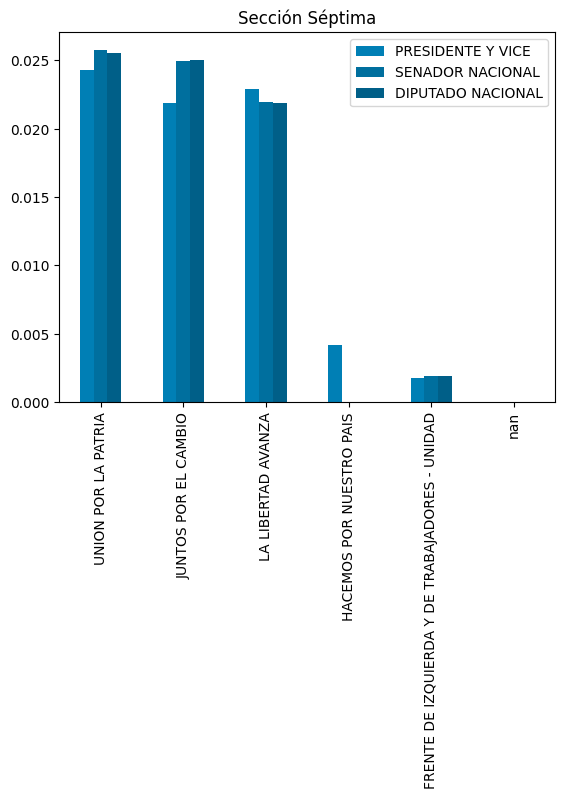

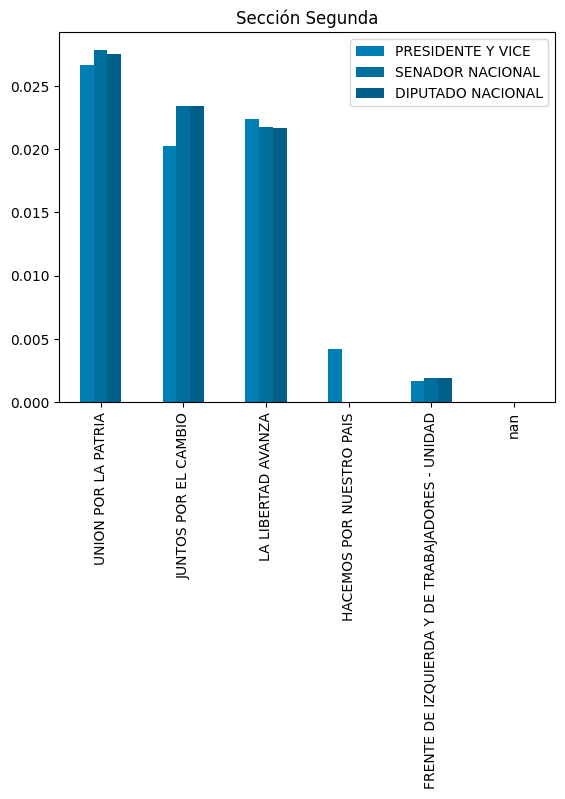

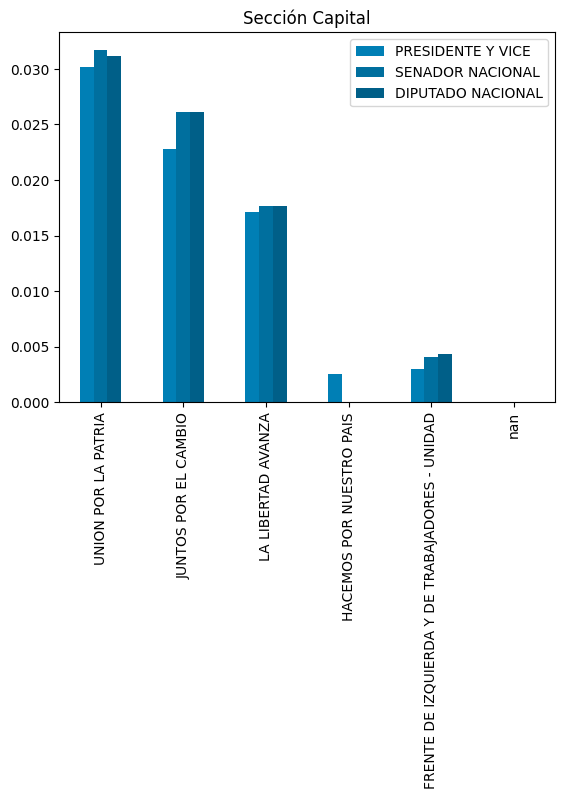

In [293]:
for s in range(len(secciones)):
    plot_df = pd.DataFrame(votos_por_seccion[s], index=df_cargos['cargo_nombre'].unique().tolist()).T
    plot_df = plot_df.set_axis(df_cargos['agrupacion_nombre'].unique().tolist(), axis=0)
    plot_df.plot.bar(title=secciones[s],xlabel='',color=['#007fb5', '#006f9e', '#005f88'])

<Axes: >

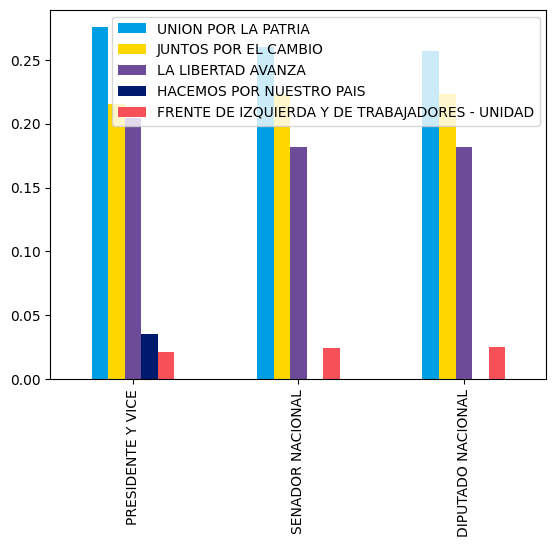

In [289]:
#Plotear grafico de barras
my_colors = {'UNION POR LA PATRIA': '#009FE3', 'JUNTOS POR EL CAMBIO': '#FFD700', 'LA LIBERTAD AVANZA': '#6C4C99', 'HACEMOS POR NUESTRO PAIS': '#001a70', 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD': '#F65058'}
plot_df = pd.DataFrame(lista_cantidad_por_a_en_cargo, index=agrupaciones).T
plot_df = plot_df.set_axis(df_cargos['cargo_nombre'].unique().tolist(), axis=0)
plot_df.plot.bar(rot= 90, color=my_colors)

In [290]:
agrupaciones = df_cargos_ag['agrupacion_nombre'].unique()
votos_por_agrupacion = []
for a in agrupaciones:
    df_agrupacion_a = df_cargos[df_cargos['agrupacion_nombre']==a]
    votos_por_cargo = []
    for c in df_cargos['cargo_nombre'].unique():
        df_agrupacion_a_cargo_c = df_agrupacion_a[df_agrupacion_a['cargo_nombre']==c]
        votos_por_seccion = []
        for seccion in df_cargos['seccionprovincial_nombre'].unique():
            df_por_seccion = df_agrupacion_a_cargo_c[df_agrupacion_a_cargo_c['seccionprovincial_nombre'] == seccion]
            votos_por_seccion.append(df_por_seccion['votos_cantidad'].sum())
        votos_por_cargo.append(votos_por_seccion/df_por_seccion['mesa_electores'].sum())
    votos_por_agrupacion.append(votos_por_cargo)    


C:\Users\Cami\AppData\Local\Temp\ipykernel_6608\3635261355.py:12: RuntimeWarning: invalid value encountered in divide
  votos_por_cargo.append(votos_por_seccion/df_por_seccion['mesa_electores'].sum())


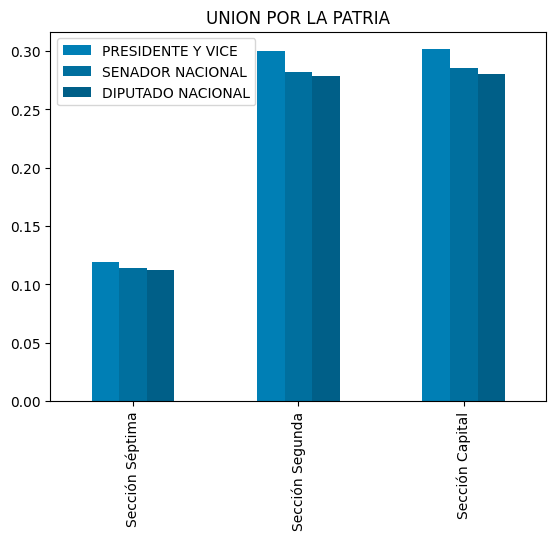

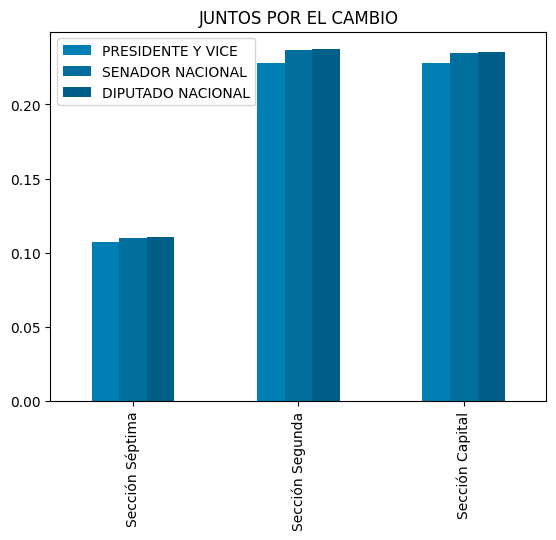

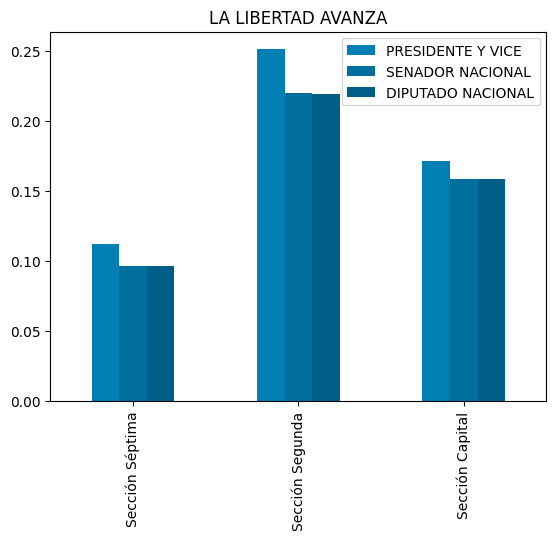

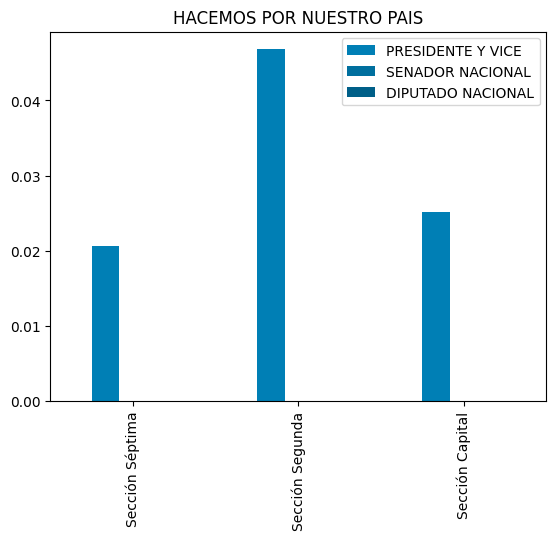

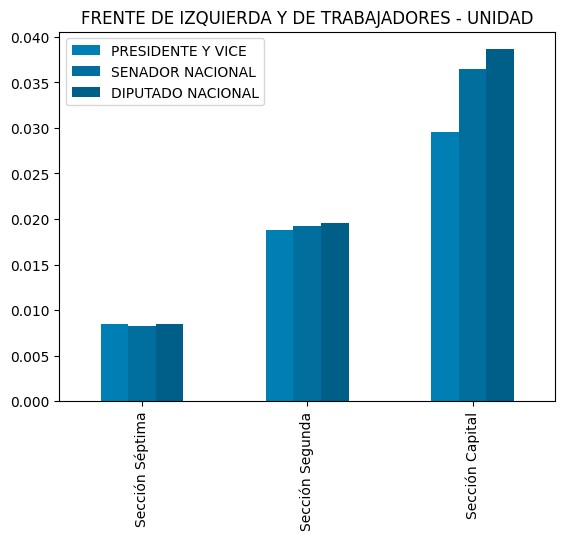

In [291]:
agrupaciones_copia = agrupaciones
for a in range(len(agrupaciones_copia)):
    plot_df = pd.DataFrame(votos_por_agrupacion[a], index=df_cargos['cargo_nombre'].unique().tolist()).T
    plot_df = plot_df.set_axis(df_cargos['seccionprovincial_nombre'].unique().tolist(), axis=0)
    plot_df.plot.bar(title=agrupaciones_copia[a],xlabel='',color=['#007fb5', '#006f9e', '#005f88'])

In [282]:
agrupaciones = df_cargos_ag['agrupacion_nombre'].unique()
votos_por_cargo2 = []
for c in df_cargos_ag['cargo_id'].unique():
    df_cargo_c = df_cargos_ag[df_cargos_ag['cargo_id']==c]
    votos_por_cargo2 = []
    for a in df_cargo_c['agrupacion_nombre'].unique():
        df_agrupacion_a_cargo_c = df_cargo_c[df_cargo_c['agrupacion_nombre']==a]
        votos_por_seccion = []
        for seccion in df_cargos['seccionprovincial_nombre'].unique():
            df_por_seccion = df_agrupacion_a_cargo_c[df_agrupacion_a_cargo_c['seccionprovincial_nombre'] == seccion]
            print(df_por_seccion['votos_cantidad'].sum())
            print(df_por_seccion['mesa_electores'].sum())
            votos_por_seccion.append(df_por_seccion['votos_cantidad'].sum())
        print(votos_por_seccion/df_por_seccion['mesa_electores'].sum())    
        votos_por_agrupacion.append(votos_por_seccion/df_por_seccion['mesa_electores'].sum())
        break
    votos_por_cargo2.append(votos_por_agrupacion)  
    break  
print(len(votos_por_cargo2[0]))

67580
278383
170051
638440
171174
567583
[0.11906629 0.29960552 0.30158409]
74


In [268]:
print(votos_por_cargo)
agrupaciones_copia = agrupaciones
for c in range(len(votos_por_cargo)):
    plot_df = pd.DataFrame(votos_por_cargo[c], index=df_cargos['agrupacion_nombre'].unique().tolist()).T
    plot_df = plot_df.set_axis(df_cargos['seccionprovincial_nombre'].unique().tolist(), axis=0)
    plot_df.plot.bar(title=votos_por_cargo[c],xlabel='',color=['#007fb5', '#006f9e', '#005f88'])

[[array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([0.00842226, 0.019206  , 0.03491472]), array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([0.00842226, 0.019206  , 0.03491472]), array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([0.00842226, 0.019206  , 0.03491472]), array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([0.00842226, 0.019206  , 0.03491472]), array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([0.00842226, 0.019206  , 0.03491472]), array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([nan, nan, nan]), array([0.00842226, 0.019206  , 0.03491472]), array([nan, nan, nan]), array([0.11906629, 0.29960552, 0.30158409]), array([0.1074257 , 0.22811818, 0.22779928]), array([0.11218

ValueError: Length of values (58) does not match length of index (6)

In [250]:
#df_agrupaciones = df_g9[df_g9['agrupacion_id'] > 0] #Filtramos los votos en blanco, nulo, impugnado, recurrido y comando
df_group_2 = df_agrupaciones.groupby(['seccionprovincial_id','seccion_id','mesa_id','agrupacion_id'],as_index=False)
#df_group.count()
#print((df_group['año'].count() == 1).all()) #Por cada mesa cada agrupacion figura una sola vez.

#query = 'agrupacion_nombre == "{x}"'.format(x=a)
#query_res = df_cargos.query(query) '''
#aaa = df_group_2[df_group_2['seccionprovincial_id'] == 2.]

#print(df_group_2['votos_cantidad'].head())
'''''

for name, group in df_group_2:
    print(name)
    aaa = group.loc(0)
    print(group['cargo_id'])
    print("\n")
    break
'''''
for seccion in df_agrupaciones['seccionprovincial_id'].unique():
    votos_por_seccion_prov = df_agrupaciones[df_agrupaciones['seccionprovincial_id'] == seccion]
    for s in df_agrupaciones['seccion_id'].unique():
        votos_por_seccion = votos_por_seccion_prov[votos_por_seccion_prov['seccion_id'] == s]
        for m in votos_por_seccion['mesa_id'].unique():
            votos_por_seccion_por_mesa = votos_por_seccion[votos_por_seccion['mesa_id'] == m]
            for a in votos_por_seccion_por_mesa['agrupacion_id'].unique():
                aaaa = votos_por_seccion_por_mesa[votos_por_seccion_por_mesa['agrupacion_id']==a]
                print()
            break
        break
    break
    
#query = 'agrupacion_nombre == "{x}"'.format(x=a)
#query_res = df_cargos.query(query) '''

          año eleccion_tipo  eleccion_id recuento_tipo  recuento_id  \
96170    2023       GENERAL            2    PROVISORIO            1   
3672097  2023       GENERAL            2    PROVISORIO            1   

        padron_tipo  distrito_id distrito_nombre  seccionprovincial_id  \
96170        NORMAL            2    Buenos Aires                   7.0   
3672097      NORMAL            2    Buenos Aires                   7.0   

        seccionprovincial_nombre  ...  mesa_tipo mesa_electores cargo_id  \
96170            Sección Séptima  ...    NATIVOS            346        1   
3672097          Sección Séptima  ...    NATIVOS            346        8   

                         cargo_nombre  agrupacion_id    agrupacion_nombre  \
96170               PRESIDENTE Y VICE            134  UNION POR LA PATRIA   
3672097  PARLAMENTO MERCOSUR NACIONAL            134  UNION POR LA PATRIA   

         lista_numero  lista_nombre votos_tipo  votos_cantidad  
96170             NaN           NaN  